In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
def plot_scatter(X, y):
    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap.colors[idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [0]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict_classes(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(xx1.shape, Z.shape)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    plot_scatter(X, y)

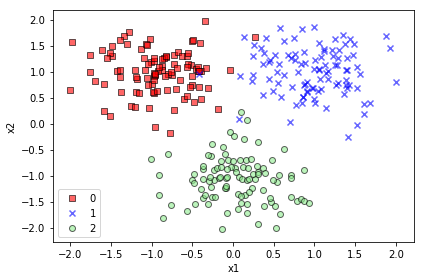

In [5]:
m1 = [-1, 1]
cov1 = [[0.2, 0],[0, 0.2]]

m2 = [1, 1]
m3 = [0, -1]

x1 = np.random.multivariate_normal(m1, cov1, 100)
x2 = np.random.multivariate_normal(m2, cov1, 100)
x3 = np.random.multivariate_normal(m3, cov1, 100)
x_data = np.concatenate((x1, x2), axis=0)
x_data = np.concatenate((x_data, x3), axis=0)

y1 = np.ones((100, ), dtype='i')-1
y2 = 2*np.ones((100, ), dtype='i')-1
y3 = 3*np.ones((100, ), dtype='i')-1
y = np.concatenate((y1, y2), axis=0)
y = np.concatenate((y, y3), axis=0)

y_data = tf.keras.utils.to_categorical(y)

plot_scatter(x_data, y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [6]:
nb_classes = 3

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, input_shape=(2,)))
model.add(tf.keras.layers.Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_data, y_data, epochs=500)

W0723 00:18:46.433018 140168433768320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 300 samples
Epoch 1/500
300/300 [==============================] - 0s 377us/sample - loss: 1.0123 - accuracy: 0.3900
Epoch 2/500
300/300 [==============================] - 0s 59us/sample - loss: 0.9614 - accuracy: 0.4033
Epoch 3/500
300/300 [==============================] - 0s 68us/sample - loss: 0.9138 - accuracy: 0.4100
Epoch 4/500
300/300 [==============================] - 0s 60us/sample - loss: 0.8688 - accuracy: 0.4600
Epoch 5/500
300/300 [==============================] - 0s 59us/sample - loss: 0.8273 - accuracy: 0.4900
Epoch 6/500
300/300 [==============================] - 0s 63us/sample - loss: 0.7880 - accuracy: 0.5600
Epoch 7/500
300/300 [==============================] - 0s 58us/sample - loss: 0.7518 - accuracy: 0.6033
Epoch 8/500
300/300 [==============================] - 0s 65us/sample - loss: 0.7192 - accuracy: 0.6333
Epoch 9/500
300/300 [==============================] - 0s 76us/sample - loss: 0.6875 - accuracy: 0.6800
Epoch 10/500
300/300 [====================

dict_keys(['loss', 'accuracy'])


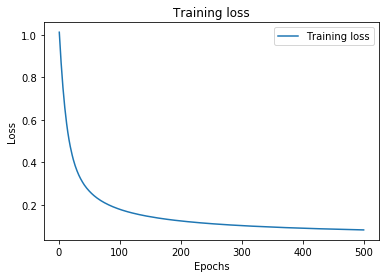

In [8]:
#print(model.predict_classes(x_data))

history_dict = history.history
print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

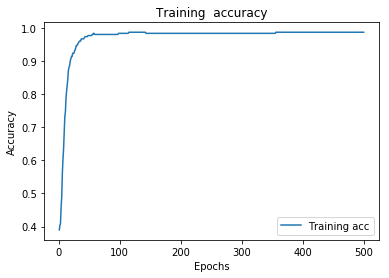

In [11]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

(301, 301) (90601,)


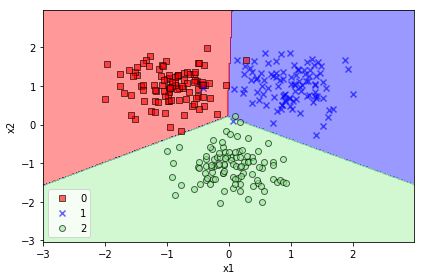

In [12]:
plot_decision_regions(x_data, y, model)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
